In [3]:
import os
import sys
sys.path.append(os.path.abspath('../src'))
print(os.path.abspath('../src'))
# sys.path.append(os.path.abspath('../lv_seg/'))
from dataset.data_loader import EchoNetDataLoader
from utils import load_config_file
# from echotrain.utils import load_config_file
import pytest
import matplotlib.pyplot as plt

D:\AIMedic\FinalProject_echocardiogram\echoC_Codes\lv-seg\src


In [4]:
root_dir = os.path.abspath(os.curdir)
if 'lv-seg' not in root_dir:
    root_dir = os.path.join(root_dir, 'lv-seg').replace('\\', '/')
config_path = os.path.join(root_dir, "../runs/template/config.yaml")
config = load_config_file(config_path)
print(config_path)

D:\AIMedic\FinalProject_echocardiogram\echoC_Codes\lv-seg\notebooks\../runs/template/config.yaml


In [5]:
dataset_obj = EchoNetDataLoader(config)
train_gen, train_n_iter = dataset_obj.create_train_data_generator()
val_gen, val_n_iter = dataset_obj.create_validation_data_generator()
test_gen, test_n_iter = dataset_obj.create_test_data_generator()

In [6]:
print(train_n_iter)
print(val_n_iter)
print(test_n_iter)

1865
322
319


0
8
(8, 112, 112)


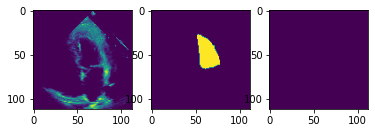

In [7]:
for i, ele in zip(range(0, 1), train_gen):
    print(i)
    print(len(ele[0]))
    print(ele[0].numpy().shape)
    first_img = ele[0][0]
    img_label = ele[1][0]
    img_weights = ele[2][0]
    fig, ax = plt.subplots(1, 3)
    ax[0].imshow(first_img)
    ax[1].imshow(img_label)
    ax[2].imshow(img_weights)
    plt.show()

0
8
(8, 112, 112)


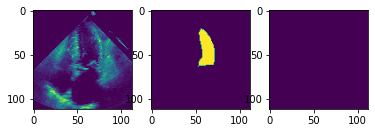

In [8]:
for i, ele in zip(range(0, 1), val_gen):
    print(i)
    print(len(ele[0]))
    print(ele[0].numpy().shape)
    first_img = ele[0][0]
    img_label = ele[1][0]
    img_weights = ele[2][0]
    fig, ax = plt.subplots(1, 3)
    ax[0].imshow(first_img)
    ax[1].imshow(img_label)
    ax[2].imshow(img_weights)
    plt.show()

0
8
(8, 112, 112)


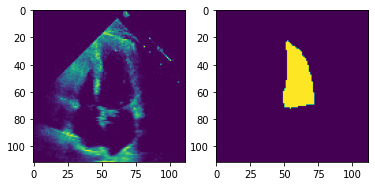

tf.Tensor(
[b'D:\\AIMedic\\FinalProject_echocardiogram\\echoC_Dataset\\echonet_dynamic\\EchoNet-Dynamic\\Cases/0X100CF05D141FF143\\0X100CF05D141FF143_ES.mhd'
 b'D:\\AIMedic\\FinalProject_echocardiogram\\echoC_Dataset\\echonet_dynamic\\EchoNet-Dynamic\\Cases/0X100CF05D141FF143\\0X100CF05D141FF143_ES_gt.mhd'], shape=(2,), dtype=string)


In [9]:
for i, ele in zip(range(0, 1), test_gen):
    print(i)
    print(len(ele[0]))
    print(ele[0].numpy().shape)
    first_img = ele[0][0]
    img_label = ele[1][0]
    img_id = ele[2][0]
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(first_img)
    ax[1].imshow(img_label)
    plt.show()
    print(img_id)